<div style="
  max-width:760px;
  margin:24px auto;
  padding:22px 24px;
  border-radius:16px;
  background:radial-gradient(circle at top left, #1f2933, #020617);
  color:#e5e7eb;
  border:1px solid #374151;
  box-shadow:0 18px 40px rgba(0,0,0,0.55);
  text-align:center;
">
  <div style="
    width:54px;
    height:54px;
    margin:0 auto 6px auto;
    border-radius:999px;
    display:flex;
    align-items:center;
    justify-content:center;
    font-size:1.8em;
    background:radial-gradient(circle at 30% 0, #38bdf8, #4f46e5);
    box-shadow:0 0 18px rgba(56,189,248,0.6);
  ">

  </div>

  <h1 style="
    margin:4px 0 0;
    font-size:2.1em;
    font-weight:800;
    line-height:1.1;
    text-align:center;
  ">
    EmbeddingAdapters 🧠→🧠
  </h1>

  <p style="
    margin:6px 0 0;
    font-size:1.05em;
    opacity:0.92;
    text-align:center;
  ">
    Make embeddings interoperable across models, tasks, and vector spaces.
  </p>

  <div style="
    margin-top:10px;
    display:flex;
    gap:8px;
    flex-wrap:wrap;
    justify-content:center;
  ">
    <span style="
      font-size:0.8em;
      padding:4px 10px;
      border-radius:999px;
      border:1px solid rgba(148,163,184,0.4);
      background:rgba(15,23,42,0.9);
    ">
      ⚙️ Model-agnostic
    </span>
    <span style="
      font-size:0.8em;
      padding:4px 10px;
      border-radius:999px;
      border:1px solid rgba(129,140,248,0.6);
      background:rgba(30,64,175,0.55);
    ">
      🧩 Plug &amp; Play
    </span>
    <span style="
      font-size:0.8em;
      padding:4px 10px;
      border-radius:999px;
      border:1px solid rgba(56,189,248,0.6);
      background:rgba(8,47,73,0.7);
    ">
      📐 Alignment-friendly
    </span>
  </div>
</div>


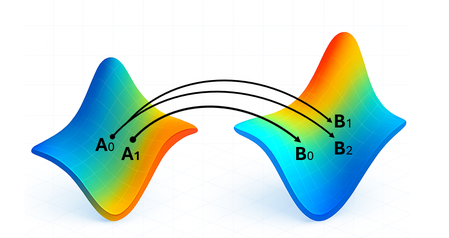

<p>
  This notebook walks you through a <strong>practical end-to-end example of EmbeddingAdapters</strong> —
  a lightweight library that makes <strong>embedding models interoperable</strong> by translating vectors
  from one model’s space into another’s.
</p>

<p>In this demo, you will:</p>
<ul>
  <li>Generate embeddings using <strong>MiniLM (<code>all-MiniLM-L6-v2</code>)</strong></li>
  <li>Use a pre-trained <strong>EmbeddingAdapter</strong> to map them into the
      <strong>OpenAI <code>text-embedding-3-small</code></strong> space</li>
</ul>

<p>
  After that, you’ll run a <strong>retrieval evaluation on a Wikipedia QA dataset</strong> using the adapter’s
  built-in <em>quality endpoint</em>, which predicts whether a query is
  <em>in-distribution</em> for the adapter.
</p>

<p>This enables a hybrid workflow where:</p>
<ul>
  <li><strong>High-confidence queries</strong> are answered locally using <strong>MiniLM + Adapter</strong></li>
  <li><strong>Low-confidence queries</strong> are safely routed to a provider model
      (e.g., OpenAI, Gemini) for embeddings</li>
</ul>

<p>
  The end result shows how a small, fast local encoder — paired with an adapter and
  quality-based routing — can deliver <strong>near-provider retrieval performance</strong> on a trained domain,
  significantly <strong>reducing API usage, network latency and operational cost</strong>.
</p>


In [1]:
# Clean start
!rm -rf EmbeddingAdapters
!git clone https://github.com/PotentiallyARobot/EmbeddingAdapters.git
%cd EmbeddingAdapters
!pip install -q -e . --no-deps

Cloning into 'EmbeddingAdapters'...
remote: Enumerating objects: 365, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 365 (delta 71), reused 41 (delta 18), pack-reused 239 (from 1)
Receiving objects: 100% (365/365), 704.70 KiB | 15.66 MiB/s, done.
Resolving deltas: 100% (204/204), done.
/content/EmbeddingAdapters
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for embedding-adapters (pyproject.toml) ... done


**Basic Usage Example:** Generate *OpenAI embeddings* from *sentence-transformers/all-MiniLM-L6-v2*

In [ ]:
import pkgutil
import transformers
import torch
import numpy as np
from sentence_transformers import SentenceTransformer
from embedding_adapters import EmbeddingAdapter

print("transformers version:", transformers.__version__)
print("modeling_layers present?:", pkgutil.find_loader("transformers.modeling_layers") is not None)

SOURCE_MODEL_ID = "sentence-transformers/all-MiniLM-L6-v2"
TARGET_MODEL_ID = "openai/text-embedding-3-small"

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# Load source model
src_model = SentenceTransformer(SOURCE_MODEL_ID, device=device)

# Load adapter from the registry
adapter = EmbeddingAdapter.from_registry(
    source=SOURCE_MODEL_ID,
    target=TARGET_MODEL_ID,
    flavor="large",
    device=device,
)

texts = [
    "NASA announces discovery of Earth-like exoplanet.",
    "How do I build a RAG pipeline?",
]
import time

src_embs = src_model.encode(
    texts,
    convert_to_numpy=True,
    normalize_embeddings=True,
)
start = time.time()
translated_embs = adapter.encode_embeddings(src_embs)
elapsed = time.time() - start
elapsed = elapsed*1000

print("Source shape     :", src_embs.shape)
print("Translated shape :", translated_embs.shape)
print("✅ EmbeddingAdapters Conversion Complete.")
print(f"{elapsed} ms")
print(f'OpenAI converted embedding: {src_embs[0][:10]}...')          # first vector (truncated print)

*EmbeddingAdapters has free and paid tier models, to access paid tier models run the login command below ( this is optional but recommended, it will take you to a link where you can purchase an api key ) ( Paid tier models are higher quality )*

In [ ]:
!embedding-adapters login


Embedding Adapters Developer API login
--------------------------------------
To use the Embedding Adapters Developer API you need an API key.

If you already have a key (from a previous purchase or from an email),
paste it below when prompted.

If you don’t have one yet:
  1. Open this link in your browser:
     https://buy.stripe.com/test_eVq28s7Kk4i737G5U8eUU01
  2. Complete checkout.
  3. Your API key will be emailed to the email you used in the purchase.
  4. Come back here and paste the key when it arrives.

For support contact embeddingadapters@gmail.com

Paste your Embedding Adapters API key (or leave blank to cancel): 

## 📊 Example 2 — Adapter Evaluation

In the previous cell, you learned the **basic usage** of an `EmbeddingAdapter`:
you created a small local model `src_model` and an `adapter` that maps it
into the `text-embedding-3-small` space.

This cell goes beyond the toy example. It runs a full retrieval benchmark on
Wikipedia Q&A data and shows **why this technique is useful in practice**,
and how the adapter’s built-in `adapter.score(...)` makes routing easy.

---

### 🧪 What this cell does

**1. Load a Wikipedia-based QA dataset (SQuAD).**  
It pulls thousands of question/answer pairs based on Wikipedia passages so we can
test retrieval in a realistic setting.

**2. Use `adapter.score(...)` for quality-based routing.**  
For every question and answer, the code calls `adapter.score(...)` to get a
confidence score that tells you how “in-distribution” that text is for this adapter.  
Only pairs above `QUALITY_THRESHOLD` are kept.  
This mimics production routing:
high-confidence text would go through the fast local adapter; low-confidence text
would be routed to the provider model instead.

**3. Build three answer embedding spaces.**  
The answers are embedded in:

- the **adapter space** (`src_model + adapter`)  
- the **true OpenAI space** (`text-embedding-3-small` or cached)  
- the **base SentenceTransformer space** (just `src_model`)

FAISS indices are created on top of these embeddings for fast similarity search.

**4. Measure retrieval quality (Recall@1/5/10).**  
For each question, the cell compares four pipelines:

- **Adapter → Adapter** (fully local, offline)  
- **Adapter → OpenAI** (local+adapter questions vs true OpenAI answers)  
- **OpenAI → OpenAI** (teacher upper bound)  
- **ST base → ST base** (small model with no adapter, as a baseline)

This shows how much the adapter improves over the base model and how close it gets to the teacher.

**5. Print a few qualitative “wins”.**  
The cell highlights examples where **Adapter → OpenAI** retrieves the correct
answer while at least one other setup fails.  
This makes it easy to see that the adapter is learning the *structure* of the OpenAI space,
not just memorizing training pairs.

**6. Define a simple RAG-style demo.**  
It exposes two helper functions: `rag_answer(query)` and `demo_query(query)`.  
After running this cell, you can call something like  
`demo_query("Who wrote the novel 1984?")` in a later cell to compare
how Adapter, OpenAI, and the base model retrieve answers for your own queries.

---

### ✨ Why this is important

This cell is where you see the **practical value** of EmbeddingAdapters:

- **Adapter → OpenAI** typically performs much better than the base MiniLM model,
  showing that the adapter makes your small local model behave more like the OpenAI model.

- **Adapter → OpenAI** approaches, but does not surpass, **OpenAI → OpenAI**,
  which is exactly what you want from a lightweight approximation of the teacher space.

- **`adapter.score(...)` gives you a built-in routing signal.**  
  You don’t need to invent your own heuristics: the adapter tells you when it’s confident
  enough to handle an input locally, and when you should fall back to the provider model.

In short, this cell shows how to turn “a small local model + a provider model”
into a **hybrid retrieval system** that is faster and cheaper than
using the provider alone, while staying close in quality.

After running it, skim the printed Recall@1/5/10 metrics, then try
`demo_query(...)` in the next cell to explore the behavior interactively.


In [ ]:
import os
os.environ["OPENAI_API_KEY"] = os.environ.get("OPENAI_API_KEY", "YOUR_API_KEY_HERE")

In [ ]:
# This cell assumes the PREVIOUS cell already created:
#   - src_model  (SentenceTransformer, e.g. all-MiniLM-L6-v2)
#   - adapter    (EmbeddingAdapter mapping src_model -> openai/text-embedding-3-small)

try:
    _ = src_model, adapter
except NameError:
    raise RuntimeError("Please run the previous cell that defines `src_model` and `adapter` first.")

# If these aren't installed in your runtime, RUN THIS CELL ONCE.
!pip install -q faiss-cpu "openai>=1.0.0" datasets

import os
import time
import textwrap
from dataclasses import dataclass
from typing import List, Tuple

import numpy as np
import faiss
from openai import OpenAI
from datasets import load_dataset
import pickle
from pathlib import Path

# ---------- OpenAI config ----------
OPENAI_EMBEDDING_MODEL = "text-embedding-3-small"
CHAT_MODEL = "gpt-4.1-mini"  # or another chat model

# Detect whether we really have a usable API key
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY", "").strip()
HAS_OPENAI_KEY = bool(OPENAI_API_KEY and OPENAI_API_KEY != "YOUR_API_KEY_HERE")
if not HAS_OPENAI_KEY:
    print("⚠️ No valid OPENAI_API_KEY found. Will use cached OpenAI embeddings if available.")

client = OpenAI(api_key=OPENAI_API_KEY or "sk-placeholder")

# Cache location + in-memory cache structure
OPENAI_CACHE_PATH = Path("EmbeddingAdapters") / "examples" / "data" / "openai_example_embeds.pkl"
_openai_cache = {
    "corpus_texts": None,
    "qa_questions": None,
    "corpus_emb": None,
    "question_emb": None,
}

# Try to load cache early (we'll verify it matches the corpus later)
if OPENAI_CACHE_PATH.exists():
    try:
        with OPENAI_CACHE_PATH.open("rb") as f:
            cached = pickle.load(f)
        if isinstance(cached, dict):
            _openai_cache.update(cached)
        print(f"📂 Loaded cached OpenAI embeddings from {OPENAI_CACHE_PATH}")
    except Exception as e:
        print(f"⚠️ Failed to load cached OpenAI embeddings: {e}")


# ================== LOAD WIKIPEDIA-BASED QAs (SQuAD) =====================

@dataclass
class QAItem:
    question: str
    answer: str
    answer_id: int  # index into corpus (answers)


# ---- CONFIGURE YOUR DATASET HERE ----
DATASET_SOURCE: str = "hf"  # "hf" or "file"

# If using a HuggingFace dataset:
# SQuAD questions are based on Wikipedia passages.
# Fields:
#   - "question": question text
#   - "answers": dict with key "text" -> list of answer strings
HF_DATASET_NAME: str = "squad"
HF_SPLIT: str = "train[:10000]"          # subset for speed; adjust as you like
HF_QUESTION_FIELD: str = "question"
HF_ANSWER_FIELD: str = "answers"

# If using a local file (CSV / JSONL) instead:
FILE_PATH: str = "knowledge_qa.csv"      # e.g. "./my_knowledge_qa.csv"
FILE_FORMAT: str = "csv"                 # "csv" or "jsonl"
FILE_QUESTION_FIELD: str = "question"
FILE_ANSWER_FIELD: str = "answer"

MAX_ANSWER_CHARS = 8000
QUALITY_THRESHOLD = 0.99         # tweak this up/down as you like

print("📥 Loading Wikipedia-based Q&A dataset (SQuAD)…")

def load_qa_from_hf(
    dataset_name: str,
    split: str,
    question_field: str,
    answer_field: str,
):
    ds = load_dataset(dataset_name, split=split)
    return ds, question_field, answer_field

def load_qa_from_file(
    path: str,
    file_format: str,
    question_field: str,
    answer_field: str,
):
    import pandas as pd

    if file_format.lower() == "csv":
        df = pd.read_csv(path)
    elif file_format.lower() in {"jsonl", "jsonlines"}:
        df = pd.read_json(path, lines=True)
    else:
        raise ValueError(f"Unsupported FILE_FORMAT: {file_format}")

    # mimic HF dataset interface: list of dicts
    records = df.to_dict(orient="records")
    return records, question_field, answer_field

# ---- Load dataset according to DATASET_SOURCE ----
if DATASET_SOURCE == "hf":
    ds, question_field, answer_field = load_qa_from_hf(
        HF_DATASET_NAME,
        HF_SPLIT,
        HF_QUESTION_FIELD,
        HF_ANSWER_FIELD,
    )
    iterator = ds
    print(f"✅ Loaded HF dataset '{HF_DATASET_NAME}' split '{HF_SPLIT}'.")
elif DATASET_SOURCE == "file":
    ds, question_field, answer_field = load_qa_from_file(
        FILE_PATH,
        FILE_FORMAT,
        FILE_QUESTION_FIELD,
        FILE_ANSWER_FIELD,
    )
    iterator = ds
    print(f"✅ Loaded local file '{FILE_PATH}'.")
else:
    raise ValueError(f"Unknown DATASET_SOURCE: {DATASET_SOURCE}")

# 1) Collect raw Q/A text (with truncation for super long answers)
raw_questions: List[str] = []
raw_answers: List[str] = []

for ex in iterator:
    # get raw values
    q_raw = ex.get(question_field)
    a_raw = ex.get(answer_field)

    if q_raw is None or a_raw is None:
        continue

    # SQuAD "answers" is a dict like {"text": [list_of_answers], "answer_start": [...]}
    if isinstance(a_raw, dict):
        texts = a_raw.get("text") or []
        if not texts:
            continue
        a = str(texts[0])
    elif isinstance(a_raw, list):
        if len(a_raw) == 0:
            continue
        a = str(a_raw[0])
    else:
        a = str(a_raw)

    q = str(q_raw)

    q = q.strip()
    a = a.strip()

    if not q or not a:
        continue

    if len(a) > MAX_ANSWER_CHARS:
        a = a[:MAX_ANSWER_CHARS]

    raw_questions.append(q)
    raw_answers.append(a)

print(f"🧾 Total raw Q/A pairs before quality filter: {len(raw_questions)}")

# 2) Compute source-space embeddings for questions & answers
print("\n🔍 Computing source (SentenceTransformer) embeddings for quality scoring…")
q_src_embs = src_model.encode(
    raw_questions,
    convert_to_numpy=True,
    normalize_embeddings=True,
)
a_src_embs = src_model.encode(
    raw_answers,
    convert_to_numpy=True,
    normalize_embeddings=True,
)

# 3) Use the adapter quality endpoint in SOURCE space
print("📐 Scoring questions and answers with adapter.score_source() to detect in-distribution examples…")
q_scores = adapter.score_source(q_src_embs)
a_scores = adapter.score_source(a_src_embs)

q_conf = q_scores["confidence"]     # shape (N,)
a_conf = a_scores["confidence"]     # shape (N,)

print("\n🧪 Example quality scores (first 5):")
print(f"   (Higher = more in-distribution / reliable for this adapter; threshold={QUALITY_THRESHOLD})")
for i in range(min(5, len(raw_questions))):
    print(f"Q{i+1}: {raw_questions[i]!r}")
    print(f"   → q_conf={q_conf[i]:.3f}, a_conf={a_conf[i]:.3f}")
print()

# 4) Filter Q/A pairs that are out-of-distribution / low confidence
print("🚦 Applying quality filter:")
print("   Keeping only Q/A pairs where BOTH question and answer confidence")
print(f"   are ≥ QUALITY_THRESHOLD = {QUALITY_THRESHOLD:.2f}.\n")

corpus: List[str] = []   # filtered answers
qa_items: List[QAItem] = []

for i, (q, a) in enumerate(zip(raw_questions, raw_answers)):
    if (q_conf[i] < QUALITY_THRESHOLD): #or (a_conf[i] < QUALITY_THRESHOLD):
        continue

    answer_id = len(corpus)
    corpus.append(a)
    qa_items.append(QAItem(question=q, answer=a, answer_id=answer_id))

kept = len(qa_items)
total = len(raw_questions)
dropped = total - kept
fraction_kept = kept / total if total else 0.0

print(f"✅ Kept {kept} Q/A pairs after quality filtering "
      f"({fraction_kept*100:.1f}% of the original {total}).")
print(f"🧹 Filtered out {dropped} low-confidence / out-of-distribution pairs.")
if kept == 0:
    print("⚠️ No pairs survived filtering. Try lowering QUALITY_THRESHOLD.")
elif fraction_kept < 0.2:
    print("💡 You kept a pretty strict subset; if this feels too small, "
          "try lowering QUALITY_THRESHOLD a bit (e.g. 0.95).")

max_answer_len = max((len(c) for c in corpus), default=0)
print(f"📚 Corpus size (FAQ answers only): {len(corpus)}")
print(f"✂️ Max answer length (chars): {max_answer_len}")

# If we already loaded a cache, make sure it matches this corpus; otherwise drop it
if _openai_cache["corpus_texts"] is not None:
    if len(_openai_cache["corpus_texts"]) != len(corpus) or _openai_cache["corpus_texts"] != corpus:
        print("⚠️ Cached OpenAI embeddings do not match current filtered corpus; ignoring cache.")
        _openai_cache = {
            "corpus_texts": None,
            "qa_questions": None,
            "corpus_emb": None,
            "question_emb": None,
        }


# ================== EMBEDDING HELPERS =====================

def l2_normalize(vectors: np.ndarray, eps: float = 1e-12) -> np.ndarray:
    norms = np.linalg.norm(vectors, axis=1, keepdims=True) + eps
    return (vectors / norms).astype("float32")


def embed_with_adapter(texts: List[str], batch_size: int = 32) -> np.ndarray:
    """
    Encode texts via src_model + adapter into the OpenAI embedding space.
    Used for BOTH questions and answers when comparing adapter.
    """
    all_vecs = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        src_embs = src_model.encode(
            batch,
            convert_to_numpy=True,
            normalize_embeddings=True,
        )
        translated = adapter.encode_embeddings(src_embs)
        all_vecs.append(translated)
    all_vecs = np.vstack(all_vecs)
    return l2_normalize(all_vecs)


def embed_with_openai(texts: List[str], batch_size: int = 32) -> np.ndarray:
    """
    Encode texts directly with OpenAI text-embedding-3-small.

    If no valid OPENAI_API_KEY is present, this falls back to precomputed
    embeddings saved in OPENAI_CACHE_PATH (for the SQuAD questions only).
    """
    # Online path: use user's key
    if HAS_OPENAI_KEY:
        all_vecs = []
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i + batch_size]
            resp = client.embeddings.create(
                model=OPENAI_EMBEDDING_MODEL,
                input=batch,
            )
            vecs = np.array([d.embedding for d in resp.data], dtype="float32")
            all_vecs.append(vecs)
        all_vecs = np.vstack(all_vecs)
        return l2_normalize(all_vecs)

    # Offline / cached path
    if _openai_cache["question_emb"] is None or _openai_cache["qa_questions"] is None:
        raise RuntimeError(
            f"embed_with_openai() was called without an OPENAI_API_KEY, and no cached embeddings "
            f"were found in {OPENAI_CACHE_PATH}. Please set OPENAI_API_KEY or generate the cache "
            f"on a machine with API access."
        )

    # Build text->embedding map lazily
    if "_question_lookup" not in _openai_cache:
        _openai_cache["_question_lookup"] = {
            q: np.array(e, dtype="float32")
            for q, e in zip(_openai_cache["qa_questions"], _openai_cache["question_emb"])
        }

    lookup = _openai_cache["_question_lookup"]
    embs = []
    missing = []
    for t in texts:
        if t in lookup:
            embs.append(lookup[t])
        else:
            missing.append(t)

    if missing:
        raise RuntimeError(
            "embed_with_openai() was called without an OPENAI_API_KEY on texts that do not "
            "have cached embeddings. This offline fallback only supports the precomputed "
            "SQuAD questions.\n"
            f"Example missing text: {missing[0]!r}"
        )

    all_vecs = np.vstack(embs)
    return l2_normalize(all_vecs)


def embed_with_st(texts: List[str], batch_size: int = 32) -> np.ndarray:
    """
    Encode texts directly with the base SentenceTransformer (src_model) space.
    Used for BOTH questions and answers in the base-model baseline.
    """
    all_vecs = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        vecs = src_model.encode(
            batch,
            convert_to_numpy=True,
            normalize_embeddings=True,
        )
        all_vecs.append(vecs.astype("float32"))
    all_vecs = np.vstack(all_vecs)
    return l2_normalize(all_vecs)


# ================== BUILD INDICES (ON ANSWERS ONLY) =====================

if not corpus:
    raise RuntimeError("No examples left after quality filtering; lower QUALITY_THRESHOLD or check dataset.")

print("\n🧮 Computing answer embeddings for each space…")

print("   • Adapter (ST+adapter → OpenAI space)…")
t0 = time.time()
corpus_emb_adapter = embed_with_adapter(corpus)
t1 = time.time()
print(f"     Adapter answers: shape={corpus_emb_adapter.shape}, time={t1 - t0:.2f}s")

print("   • OpenAI (true OpenAI / cached)…")
t0 = time.time()
if _openai_cache["corpus_emb"] is not None:
    corpus_emb_openai = np.array(_openai_cache["corpus_emb"], dtype="float32")
    print("     Using cached OpenAI answer embeddings.")
else:
    if not HAS_OPENAI_KEY:
        raise RuntimeError(
            f"No valid OPENAI_API_KEY set and no cached OpenAI embeddings found at {OPENAI_CACHE_PATH}.\n"
            "Either set OPENAI_API_KEY or generate the cache on a machine with API access."
        )
    corpus_emb_openai = embed_with_openai(corpus)
    _openai_cache["corpus_texts"] = corpus
    _openai_cache["corpus_emb"] = corpus_emb_openai
t1 = time.time()
print(f"     OpenAI answers: shape={corpus_emb_openai.shape}, time={t1 - t0:.2f}s")

print("   • SentenceTransformer base space…")
t0 = time.time()
corpus_emb_st = embed_with_st(corpus)
t1 = time.time()
print(f"     ST base answers: shape={corpus_emb_st.shape}, time={t1 - t0:.2f}s")

# Ensure we have cached question embeddings if we have an API key
questions_for_eval = [qa.question for qa in qa_items]
if _openai_cache["question_emb"] is None and HAS_OPENAI_KEY:
    print("\n💾 Computing question embeddings (OpenAI) for caching and future offline runs…")
    _openai_cache["qa_questions"] = questions_for_eval
    _openai_cache["question_emb"] = embed_with_openai(questions_for_eval)

    try:
        OPENAI_CACHE_PATH.parent.mkdir(parents=True, exist_ok=True)
        with OPENAI_CACHE_PATH.open("wb") as f:
            pickle.dump(_openai_cache, f)
        print(f"   → Saved OpenAI embeddings cache to {OPENAI_CACHE_PATH}")
    except Exception as e:
        print(f"⚠️ Failed to write OpenAI embeddings cache: {e}")
elif _openai_cache["question_emb"] is not None:
    print("\n📂 Using cached OpenAI question embeddings for evaluation.")

dim_adapter = corpus_emb_adapter.shape[1]
dim_openai = corpus_emb_openai.shape[1]
dim_st = corpus_emb_st.shape[1]

# Adapter & OpenAI spaces are both OpenAI-dim
assert dim_adapter == dim_openai, "Adapter and OpenAI embedding dims must match."

index_answers_adapter = faiss.IndexFlatIP(dim_adapter)
index_answers_openai = faiss.IndexFlatIP(dim_openai)
index_answers_st = faiss.IndexFlatIP(dim_st)

index_answers_adapter.add(corpus_emb_adapter)
index_answers_openai.add(corpus_emb_openai)
index_answers_st.add(corpus_emb_st)


# ================== EVALUATION (R@1 / R@5 / R@10) =====================

def evaluate_retriever(
    embed_question_fn,
    index,
    qa_items: List[QAItem],
    k_max: int = 10,
    batch_size: int = 32,
) -> Tuple[float, float, float, List[Tuple[int, int]]]:
    """
    Evaluate a question encoder against a fixed answer index.
    Returns:
        recall1, recall5, recall10, pairs
        where pairs = list of (true_id, top1_pred_id) for each question.
    """
    questions = [q.question for q in qa_items]
    n = len(qa_items)

    hit1 = hit5 = hit10 = 0
    pairs: List[Tuple[int, int]] = []

    for i in range(0, n, batch_size):
        batch = questions[i : i + batch_size]
        q_embs = embed_question_fn(batch)
        _, I = index.search(q_embs, k_max)

        for j, row in enumerate(I):
            qa = qa_items[i + j]
            true_id = qa.answer_id
            top1 = int(row[0])
            top5 = row[:5]
            top10 = row[:10]

            if true_id == top1:
                hit1 += 1
            if true_id in top5:
                hit5 += 1
            if true_id in top10:
                hit10 += 1

            pairs.append((true_id, top1))

    recall1 = hit1 / n
    recall5 = hit5 / n
    recall10 = hit10 / n
    return recall1, recall5, recall10, pairs


print("\n📊 Evaluating retrievers on the filtered in-distribution Q/A set…")

print("\n1️⃣ Adapter questions → Adapter answer space")
r1_adapter, r5_adapter, r10_adapter, adapter_pairs = evaluate_retriever(
    embed_with_adapter,            # Q: MiniLM+adapter
    index_answers_adapter,         # A: MiniLM+adapter
    qa_items
)
print(f"   Adapter→Adapter Recall@1 : {r1_adapter * 100:.2f}%")
print(f"   Adapter→Adapter Recall@5 : {r5_adapter * 100:.2f}%")
print(f"   Adapter→Adapter Recall@10: {r10_adapter * 100:.2f}%")

print("\n2️⃣ Adapter questions → TRUE OpenAI answer space")
r1_adapt_openai, r5_adapt_openai, r10_adapt_openai, adapt_openai_pairs = evaluate_retriever(
    embed_with_adapter,            # Q: MiniLM+adapter
    index_answers_openai,          # A: TRUE OpenAI embeddings (or cached)
    qa_items
)
print(f"   Adapter→OpenAI Recall@1 : {r1_adapt_openai * 100:.2f}%")
print(f"   Adapter→OpenAI Recall@5 : {r5_adapt_openai * 100:.2f}%")
print(f"   Adapter→OpenAI Recall@10: {r10_adapt_openai * 100:.2f}%")

print("\n3️⃣ OpenAI questions → OpenAI answer space")
r1_openai, r5_openai, r10_openai, openai_pairs = evaluate_retriever(
    embed_with_openai,             # Q: TRUE OpenAI (or cached)
    index_answers_openai,          # A: TRUE OpenAI (or cached)
    qa_items
)
print(f"   OpenAI→OpenAI Recall@1 : {r1_openai * 100:.2f}%")
print(f"   OpenAI→OpenAI Recall@5 : {r5_openai * 100:.2f}%")
print(f"   OpenAI→OpenAI Recall@10: {r10_openai * 100:.2f}%")

print("\n4️⃣ ST base questions → ST base answer space")
r1_st, r5_st, r10_st, st_pairs = evaluate_retriever(
    embed_with_st,                 # Q: MiniLM/ST
    index_answers_st,              # A: MiniLM/ST
    qa_items
)
print(f"   ST base Recall@1 : {r1_st * 100:.2f}%")
print(f"   ST base Recall@5 : {r5_st * 100:.2f}%")
print(f"   ST base Recall@10: {r10_st * 100:.2f}%")


print("\n🔍 Qualitative view: Adapter→OpenAI *victories* on first 200 examples")
print("    (Highlights cases where Adapter→OpenAI is correct but at least one other system is wrong)\n")

shown = 0
for i, qa in enumerate(qa_items[:200]):
    true_id = qa.answer_id

    # Top-1 predictions from each setup
    true_a, pred_a = adapter_pairs[i]            # Adapter→Adapter
    true_ao, pred_ao = adapt_openai_pairs[i]     # Adapter→OpenAI
    true_o, pred_o = openai_pairs[i]             # OpenAI→OpenAI
    true_s, pred_s = st_pairs[i]                 # ST base→ST base

    # Highlight "wins" for Adapter→OpenAI:
    #  - Adapter→OpenAI is correct
    #  - At least one of the others is wrong
    if (pred_ao == true_id) and (
        (pred_a != true_id) or
        (pred_o != true_id) or
        (pred_s != true_id)
    ):
        print("\n--------------------------------")
        print(f"Q{i:04d}: {qa.question[:120]}{'...' if len(qa.question) > 120 else ''}")
        print(f"  TRUE id: {true_id}")
        print(f"  ADAPT→ADAPT   id: {pred_a:5d} {'✅' if pred_a == true_id else '❌'}")
        print(f"  ADAPT→OPENAI  id: {pred_ao:5d} {'✅' if pred_ao == true_id else '❌'}  ⬅️")
        print(f"  OPENAI→OPENAI id: {pred_o:5d} {'✅' if pred_o == true_id else '❌'}")
        print(f"  ST base       id: {pred_s:5d} {'✅' if pred_s == true_id else '❌'}")

        print("  TRUE ANSWER        :", textwrap.shorten(corpus[true_id], width=140))
        print("  ADAPT→ADAPT ANSWER :", textwrap.shorten(corpus[pred_a], width=140))
        print("  ADAPT→OPENAI ANSWER:", textwrap.shorten(corpus[pred_ao], width=140))
        print("  OPENAI ANSWER      :", textwrap.shorten(corpus[pred_o], width=140))
        print("  ST ANSWER          :", textwrap.shorten(corpus[pred_s], width=140))

        shown += 1
        if shown >= 5:
            break

# Fallback: if we didn't see any Adapter→OpenAI victories, show generic disagreements
if shown == 0:
    print("   (No clear Adapter→OpenAI victories found in first 200; "
          "showing general disagreements instead.)")

    shown = 0
    for i, qa in enumerate(qa_items[:200]):
        true_id = qa.answer_id

        true_a, pred_a = adapter_pairs[i]
        true_ao, pred_ao = adapt_openai_pairs[i]
        true_o, pred_o = openai_pairs[i]
        true_s, pred_s = st_pairs[i]

        if (
            (pred_a != true_id)
            or (pred_ao != true_id)
            or (pred_o != true_id)
            or (pred_s != true_id)
        ):
            print("\n--------------------------------")
            print(f"Q{i:04d}: {qa.question[:120]}{'...' if len(qa.question) > 120 else ''}")
            print(f"  TRUE id: {true_id}")
            print(f"  ADAPT→ADAPT   id: {pred_a:5d} {'✅' if pred_a == true_id else '❌'}")
            print(f"  ADAPT→OPENAI  id: {pred_ao:5d} {'✅' if pred_ao == true_id else '❌'}")
            print(f"  OPENAI→OPENAI id: {pred_o:5d} {'✅' if pred_o == true_id else '❌'}")
            print(f"  ST base       id: {pred_s:5d} {'✅' if pred_s == true_id else '❌'}")

            print("  TRUE ANSWER        :", textwrap.shorten(corpus[true_id], width=140))
            print("  ADAPT→ADAPT ANSWER :", textwrap.shorten(corpus[pred_a], width=140))
            print("  ADAPT→OPENAI ANSWER:", textwrap.shorten(corpus[pred_ao], width=140))
            print("  OPENAI ANSWER      :", textwrap.shorten(corpus[pred_o], width=140))
            print("  ST ANSWER          :", textwrap.shorten(corpus[pred_s], width=140))

            shown += 1
            if shown >= 5:
                break


# ================== SIMPLE RAG DEMO (OPTIONAL) =====================

def rag_answer(query: str, k: int = 5) -> str:
    """
    Simple RAG using OpenAI question embeddings + chat, where:
    - Docs are just answer strings.
    - We treat them as 'candidate answers' for the query.

    NOTE: This requires a real OpenAI API key; the cached embeddings are only
    for the benchmark Q/A evaluation, not arbitrary user queries.
    """
    if not HAS_OPENAI_KEY:
        raise RuntimeError(
            "RAG demo requires a valid OPENAI_API_KEY. "
            "Cached embeddings are only used for the SQuAD benchmarking."
        )

    q_emb = embed_with_openai([query])
    D, I = index_answers_openai.search(q_emb, k)
    answers = [corpus[idx] for idx in I[0]]
    context = "\n".join(f"[CANDIDATE {i+1}] {a}" for i, a in enumerate(answers))

    system_prompt = (
        "You are a retrieval-augmented QA assistant.\n"
        "You are given a set of candidate answers (short phrases/sentences) for the user's question.\n"
        "Use ONLY those candidates to answer. If none look relevant, say you cannot answer.\n\n"
        f"CANDIDATE ANSWERS:\n{context}\n"
        "-------------------------\n"
    )
    comp = client.chat.completions.create(
        model=CHAT_MODEL,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": query},
        ],
        temperature=0.2,
    )
    answer = comp.choices[0].message.content
    return answer


def demo_query(query: str, k: int = 3):
    """
    CLI-style demo:
      - prints top-k answers for Adapter, OpenAI, and ST base
      - prints a RAG answer from OpenAI over the OpenAI index
    """
    if not query.strip():
        print("Please provide a non-empty query.")
        return

    print("=" * 80)
    print(f"QUERY: {query}\n")

    # Compute adapter query embedding once (MiniLM + adapter → OpenAI-like space)
    q_emb_a = embed_with_adapter([query])

    # Adapter retrieval: Adapter-Q vs Adapter-A
    D_a, I_a = index_answers_adapter.search(q_emb_a, k)
    print("---- Adapter retrieval (Q via ST+adapter → Adapter answer corpus) ----")
    for rank, (score, idx) in enumerate(zip(D_a[0], I_a[0]), start=1):
        print(f"[{rank}] score={score:.4f}")
        print(textwrap.shorten(corpus[idx], width=200))
        print()

    # Adapter-Q vs TRUE OpenAI answer corpus
    D_ao, I_ao = index_answers_openai.search(q_emb_a, k)
    print("---- Adapter-Q vs TRUE OpenAI answer corpus ----")
    for rank, (score, idx) in enumerate(zip(D_ao[0], I_ao[0]), start=1):
        print(f"[{rank}] score={score:.4f}")
        print(textwrap.shorten(corpus[idx], width=200))
        print()

    # OpenAI retrieval
    try:
        q_emb_o = embed_with_openai([query])
        D_o, I_o = index_answers_openai.search(q_emb_o, k)
        print("---- OpenAI retrieval (Q → answer corpus) ----")
        for rank, (score, idx) in enumerate(zip(D_o[0], I_o[0]), start=1):
            print(f"[{rank}] score={score:.4f}")
            print(textwrap.shorten(corpus[idx], width=200))
            print()
    except RuntimeError as e:
        print("---- OpenAI retrieval (Q → answer corpus) ----")
        print(f"Skipped (reason: {e})\n")

    # ST base retrieval
    q_emb_s = embed_with_st([query])
    D_s, I_s = index_answers_st.search(q_emb_s, k)
    print("---- ST base retrieval (Q → ST answer corpus) ----")
    for rank, (score, idx) in enumerate(zip(D_s[0], I_s[0]), start=1):
        print(f"[{rank}] score={score:.4f}")
        print(textwrap.shorten(corpus[idx], width=200))
        print()

    # RAG answer
    try:
        print("---- RAG answer (OpenAI encoder + chat over answer corpus) ----")
        ans = rag_answer(query, k=5)
        print(ans)
    except RuntimeError as e:
        print("---- RAG answer (OpenAI encoder + chat over answer corpus) ----")
        print(f"Skipped (reason: {e})")


# ================== FINAL CACHE SAVE =====================

try:
    OPENAI_CACHE_PATH.parent.mkdir(parents=True, exist_ok=True)
    with OPENAI_CACHE_PATH.open("wb") as f:
        pickle.dump(_openai_cache, f)
    print(f"\n💾 Final save: OpenAI embeddings cache written to {OPENAI_CACHE_PATH}")
except Exception as e:
    print(f"\n⚠️ Failed to write OpenAI embeddings cache at end of cell: {e}")

print("\n✅ Setup complete (SQuAD / Wikipedia questions).")
print("You now have Recall@1/5/10 for:")
print("  - Adapter vs OpenAI-space answers")
print("  - Adapter-Q vs OpenAI answer corpus (with qualitative Adapter→OpenAI wins)")
print("  - OpenAI vs OpenAI-space answers (using API or cached embeddings)")
print("  - Base ST vs base ST-space answers (your base-to-base comparison)")
print('Call e.g.  demo_query("Who wrote the novel 1984?")  in a new cell to inspect retrieval.')

In [ ]:
demo_query("what degree comes before a phd")

<div style="font-family: system-ui, -apple-system, BlinkMacSystemFont, 'Segoe UI', sans-serif; line-height: 1.5; max-width: 900px;">
  <h2>📊 TriviaQA Retrieval Evaluation (No Quality Tweaks)</h2>

  <p>
    The cell <strong>below</strong> runs a retrieval evaluation on the
    <strong>TriviaQA</strong> validation split (not used in training). For each question,
    we embed the question and all answers, then check whether the correct answer appears
    in the top K results ranked by cosine similarity. The metrics shown are
    <strong>Recall@1</strong>, <strong>Recall@5</strong>, and <strong>Recall@10</strong>.
  </p>

  <h3>1️⃣ What each configuration is measuring</h3>

  <p>
    <strong>Adapter questions → Adapter answer space</strong><br>
    Both questions and answers are embedded using the source model plus the adapter,
    and compared in the adapter’s OpenAI-aligned space. This shows how well the adapter
    performs as a self-contained embedding model (no true OpenAI embeddings at all).
    In the results below, this setup gets:
    <br>
    Recall@1 = 9.86%, Recall@5 = 22.98%, Recall@10 = 29.56%.
  </p>

  <p>
    <strong>Adapter questions → TRUE OpenAI answer space</strong><br>
    Questions are embedded with the source model + adapter, while answers use
    true OpenAI embeddings. This is the “<em>MiniLM + adapter querying a real OpenAI index</em>”
    scenario. It tests how well the adapter aligns the source space into real OpenAI space.
    Here we see:
    <br>
    Recall@1 = 14.02%, Recall@5 = 30.48%, Recall@10 = 37.82%.
  </p>

  <p>
    <strong>OpenAI questions → TRUE OpenAI answer space</strong><br>
    Both questions and answers use true OpenAI embeddings. This is effectively the
    upper bound in this experiment, because the model is working natively in its own space.
    The results are:
    <br>
    Recall@1 = 21.94%, Recall@5 = 43.38%, Recall@10 = 51.70%.
  </p>

  <p>
    <strong>ST-base questions → ST-base answer space</strong><br>
    Both questions and answers use the raw ST-base / MiniLM model, without any adapter.
    This is the baseline quality of the original model in its own space. The results are:
    <br>
    Recall@1 = 6.28%, Recall@5 = 16.66%, Recall@10 = 22.76%.
  </p>

  <h3>2️⃣ How to interpret the numbers</h3>

  <p>
    The <strong>OpenAI→OpenAI</strong> configuration has the highest recall at all K values,
    which is expected since it is the native embedding model in its own space.
  </p>

  <p>
    Comparing <strong>ST-base→ST-base</strong> with <strong>Adapter→Adapter</strong>,
    the adapter clearly improves retrieval quality. For example, Recall@5 increases from
    16.66% (ST-base) to 22.98% (Adapter), and Recall@10 increases from 22.76% to 29.56%.
    This shows that even when used purely in its own translated space, the adapter provides
    a higher-quality semantic representation than the raw base model.
  </p>

  <p>
    When we mix spaces in <strong>Adapter Q → TRUE OpenAI A</strong>, performance improves
    further compared to Adapter→Adapter (e.g., Recall@10 goes from 29.56% to 37.82%).
    This indicates that the adapter is not just performing a random projection: it is
    learning a meaningful alignment into the OpenAI embedding space that allows it to
    query real OpenAI vectors effectively.
  </p>

  <p>
    There is still a gap between <strong>Adapter Q → TRUE OpenAI A</strong> and
    <strong>OpenAI Q → TRUE OpenAI A</strong>. For example, Recall@10 is 37.82% with
    the adapter and 51.70% with native OpenAI embeddings. That remaining gap is the
    headroom for better alignment, larger adapters, or additional retrieval tricks
    such as re-ranking or query expansion.
  </p>

  <h3>3️⃣ Why “no quality tweaking” is important</h3>

  <p>
    All of these numbers come from <strong>plain cosine similarity search</strong>:
    no re-ranking LLM calls, no query expansion, no heuristics. In a production
    retrieval system, you would typically add those quality tweaks on top of the
    embeddings, which can close part of the gap to full OpenAI performance. Here,
    the goal is to isolate and compare the raw embedding behavior of ST-base,
    the adapter, and true OpenAI embeddings on an unseen QA dataset.
  </p>
</div>


In [ ]:
# ================== QA EVAL ON NEW DATASET: TRIVIAQA (UNSEEN) ==================
# Evaluates:
#   1) Adapter questions → Adapter answer space
#   2) Adapter questions → TRUE OpenAI answer space
#   3) OpenAI questions  → TRUE OpenAI answer space
#   4) ST-base questions → ST-base answer space   <-- NEW
#
# Uses TriviaQA (not used in your training pipeline so far).

!pip install -q datasets tqdm

import numpy as np
from datasets import load_dataset
from tqdm.auto import tqdm
import math
import random

# ---------- CONFIG ----------
OPENAI_MODEL = "text-embedding-3-small"
N_PAIRS      = 5000   # how many Q/A pairs to evaluate (you can bump this)
MAX_Q_CHARS  = 256
MAX_A_CHARS  = 256

# sanity: make sure src_model, adapter, client exist
try:
    _ = src_model
    _ = adapter
    _ = client
except NameError as e:
    raise RuntimeError(
        "You must define `src_model`, `adapter`, and `client = OpenAI()` "
        "before running this cell."
    ) from e


# ---------- EMBEDDING HELPERS ----------

def l2_normalize(x: np.ndarray) -> np.ndarray:
    norms = np.linalg.norm(x, axis=1, keepdims=True) + 1e-12
    return x / norms


def embed_openai(texts):
    """True OpenAI embeddings in target space."""
    if isinstance(texts, str):
        texts = [texts]
    out = []
    B = 128
    for i in range(0, len(texts), B):
        batch = texts[i:i+B]
        resp = client.embeddings.create(
            model=OPENAI_MODEL,
            input=batch,
        )
        out.extend([d.embedding for d in resp.data])
    return l2_normalize(np.array(out, dtype="float32"))


def embed_adapter_to_openai(texts):
    """MiniLM → adapter → OpenAI space."""
    if isinstance(texts, str):
        texts = [texts]
    # Source (MiniLM) embeddings
    src_embs = src_model.encode(
        texts,
        convert_to_numpy=True,
        normalize_embeddings=True,  # good for adapter training
    ).astype("float32")
    # Translate via adapter
    translated = adapter.encode_embeddings(src_embs)
    return l2_normalize(np.asarray(translated, dtype="float32"))


# ---------- LOAD TRIVIAQA (UNSEEN QA DATASET) ----------

print("📥 Loading TriviaQA validation split (unfiltered)…")
ds = load_dataset("trivia_qa", "unfiltered", split="validation")

questions = []
answers   = []

# TriviaQA structure: each example has fields like:
#  - "question"
#  - "answer": {"value": "...", "aliases": [...], ...}
for ex in tqdm(ds, desc="Collecting TriviaQA Q/A"):
    q = (ex.get("question") or "").strip()
    ans_obj = ex.get("answer") or {}
    a = (ans_obj.get("value") or "").strip()

    if not q or not a:
        continue

    q = q[:MAX_Q_CHARS]
    a = a[:MAX_A_CHARS]

    questions.append(q)
    answers.append(a)

    if len(questions) >= N_PAIRS:
        break

N = len(questions)
print(f"✅ Collected {N} Q/A pairs from TriviaQA (unseen).")


# ---------- EMBED ANSWERS IN FOUR CONFIGS ----------

print("\n🧮 Embedding answers (this is the index for retrieval)…")

print("  • Adapter → OpenAI space (answers)…")
adapter_ans_embs = embed_adapter_to_openai(answers)
print("    adapter_ans_embs:", adapter_ans_embs.shape)

print("  • TRUE OpenAI space (answers)…")
openai_ans_embs = embed_openai(answers)
print("    openai_ans_embs :", openai_ans_embs.shape)

print("  • ST base (source model) space (answers)…")
src_ans_embs = src_model.encode(
    answers,
    convert_to_numpy=True,
    normalize_embeddings=True,
).astype("float32")
src_ans_embs = l2_normalize(src_ans_embs)
print("    src_ans_embs     :", src_ans_embs.shape)


# ---------- EMBED QUESTIONS UNDER ALL THREE MODELS ----------

print("\n🧮 Embedding questions…")

print("  • Adapter → OpenAI space (questions)…")
adapter_q_embs = embed_adapter_to_openai(questions)
print("    adapter_q_embs:", adapter_q_embs.shape)

print("  • TRUE OpenAI space (questions)…")
openai_q_embs = embed_openai(questions)
print("    openai_q_embs :", openai_q_embs.shape)

print("  • ST base (source model) space (questions)…")
src_q_embs = src_model.encode(
    questions,
    convert_to_numpy=True,
    normalize_embeddings=True,
).astype("float32")
src_q_embs = l2_normalize(src_q_embs)
print("    src_q_embs     :", src_q_embs.shape)


# ---------- EVAL HELPERS ----------

def recall_at_k(q_embs, ans_embs, k_values=(1, 5, 10), batch_size=256):
    """
    q_embs: (N, d)
    ans_embs: (N, d) – answer i corresponds to question i
    Returns Recall@K for each K in k_values.
    """
    N = q_embs.shape[0]
    hits = {k: 0 for k in k_values}
    n_batches = math.ceil(N / batch_size)

    for b in tqdm(range(n_batches), desc="Evaluating recall"):
        start = b * batch_size
        end   = min(N, (b + 1) * batch_size)
        Q = q_embs[start:end]     # (B, d)
        S = Q @ ans_embs.T        # cosine sim matrix (B, N)
        ranks = np.argsort(-S, axis=1)  # descending

        for i, q_idx in enumerate(range(start, end)):
            row = ranks[i]
            for k in k_values:
                if q_idx in row[:k]:
                    hits[k] += 1

    recalls = {k: hits[k] / N for k in k_values}
    return recalls


def show_some_qualitative(q_embs, ans_embs, tag, num_samples=5, k=5):
    """
    Print a few qualitative examples of retrieval behavior for debugging.
    """
    print(f"\n🔍 Qualitative examples for {tag} (k={k}):")
    N = q_embs.shape[0]
    indices = random.sample(range(N), min(num_samples, N))

    sims = q_embs @ ans_embs.T
    for idx in indices:
        q = questions[idx]
        true_a = answers[idx]
        row = sims[idx]
        topk = np.argsort(-row)[:k]

        print("\n--------------------------------")
        print(f"Q{idx:04d}: {q}")
        print(f"TRUE id: {idx}")
        print(f"TRUE A:  {true_a}")
        print("Top hits:")
        for rank, aid in enumerate(topk, start=1):
            marker = "✅" if aid == idx else "❌"
            print(f"  {marker} rank={rank}  id={aid}  sim={row[aid]:.4f}")
            print(f"     A: {answers[aid]}")
        print("--------------------------------")


# ---------- 1) ADAPTER Q → ADAPTER A SPACE ----------

print("\n1️⃣ Adapter questions → Adapter answer space")
rec_adapter_adapter = recall_at_k(adapter_q_embs, adapter_ans_embs, k_values=(1, 5, 10))
print("   Adapter→Adapter Recall@1 :", f"{100*rec_adapter_adapter[1]:.2f}%")
print("   Adapter→Adapter Recall@5 :", f"{100*rec_adapter_adapter[5]:.2f}%")
print("   Adapter→Adapter Recall@10:", f"{100*rec_adapter_adapter[10]:.2f}%")


# ---------- 2) ADAPTER Q → TRUE OPENAI A SPACE ----------

print("\n2️⃣ Adapter questions → TRUE OpenAI answer space")
rec_adapter_openai = recall_at_k(adapter_q_embs, openai_ans_embs, k_values=(1, 5, 10))
print("   Adapter→OpenAI Recall@1 :", f"{100*rec_adapter_openai[1]:.2f}%")
print("   Adapter→OpenAI Recall@5 :", f"{100*rec_adapter_openai[5]:.2f}%")
print("   Adapter→OpenAI Recall@10:", f"{100*rec_adapter_openai[10]:.2f}%")


# ---------- 3) OPENAI Q → TRUE OPENAI A SPACE ----------

print("\n3️⃣ OpenAI questions → TRUE OpenAI answer space")
rec_openai_openai = recall_at_k(openai_q_embs, openai_ans_embs, k_values=(1, 5, 10))
print("   OpenAI→OpenAI Recall@1 :", f"{100*rec_openai_openai[1]:.2f}%")
print("   OpenAI→OpenAI Recall@5 :", f"{100*rec_openai_openai[5]:.2f}%")
print("   OpenAI→OpenAI Recall@10:", f"{100*rec_openai_openai[10]:.2f}%")


# ---------- 4) ST BASE Q → ST BASE A SPACE ----------

print("\n4️⃣ ST-base questions → ST-base answer space")
rec_src_src = recall_at_k(src_q_embs, src_ans_embs, k_values=(1, 5, 10))
print("   ST-base→ST-base Recall@1 :", f"{100*rec_src_src[1]:.2f}%")
print("   ST-base→ST-base Recall@5 :", f"{100*rec_src_src[5]:.2f}%")
print("   ST-base→ST-base Recall@10:", f"{100*rec_src_src[10]:.2f}%")


# ---------- QUALITATIVE EXAMPLES ----------

show_some_qualitative(adapter_q_embs, openai_ans_embs, "Adapter Q → OpenAI A", num_samples=5, k=5)
show_some_qualitative(openai_q_embs, openai_ans_embs, "OpenAI Q → OpenAI A", num_samples=5, k=5)
show_some_qualitative(src_q_embs, src_ans_embs, "ST-base Q → ST-base A", num_samples=5, k=5)

print("\n✅ TriviaQA eval complete. You now have Recall@1/5/10 on a brand-new QA dataset, including ST-base→ST-base.")
